In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline


print("Matplotlib version", matplotlib.__version__)
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

Matplotlib version 3.1.1


In [3]:
%%time
# From kernel https://www.kaggle.com/gemartin/load-data-reduce-memory-usage
def reduce_mem_usage(df):
    """ iterate through all the columns of a dataframe and modify the data type
        to reduce memory usage.        
    """
    start_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage of dataframe is {:.2f} MB'.format(start_mem))
    
    for col in df.columns:
        col_type = df[col].dtype
        
        if col_type != object:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)
        else:
            df[col] = df[col].astype('category')

    end_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage after optimization is: {:.2f} MB'.format(end_mem))
    print('Decreased by {:.1f}%'.format(100 * (start_mem - end_mem) / start_mem))
    
    return df

Wall time: 0 ns


In [4]:
os.chdir(r"C:\Users\박유경\Desktop\project")
df = pd.read_csv('jeju_financial_life_data.csv', header='infer', na_values=[' '])
df = reduce_mem_usage(df)

Memory usage of dataframe is 2.15 MB
Memory usage after optimization is: 0.94 MB
Decreased by 56.0%


In [22]:
df.shape

(10422, 27)

In [23]:
df_zip=df['age'].groupby(df['zip_cd']) 
df_zip.mean()

zip_cd
63000    57.125000
63001    61.777778
63002    55.153846
63003    57.125000
63004    56.000000
           ...    
63639    55.153846
63640    55.153846
63641    55.153846
63643    55.153846
63644    51.500000
Name: age, Length: 474, dtype: float64

Seaborn version :  0.9.0


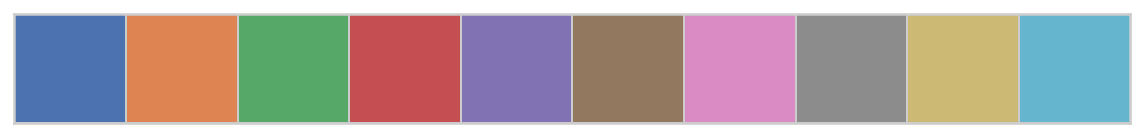

In [26]:
print("Seaborn version : ", sns.__version__)
sns.set()
sns.set_style('whitegrid')
sns.set_color_codes()
current_palette = sns.color_palette()
sns.palplot(current_palette)

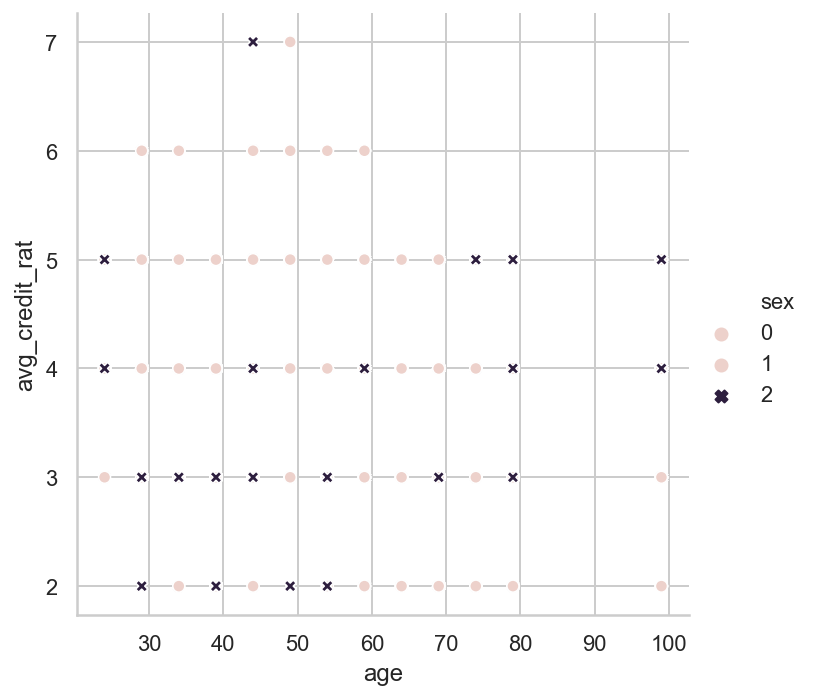

In [35]:
#vehicle = sns.load_dataset(df)
sns.relplot(x="age", y="avg_credit_rat", hue="sex", style="sex",data=df)

In [39]:
df['avg_credit_rat'].unique()

array([5, 4, 2, 3, 6, 7], dtype=int64)

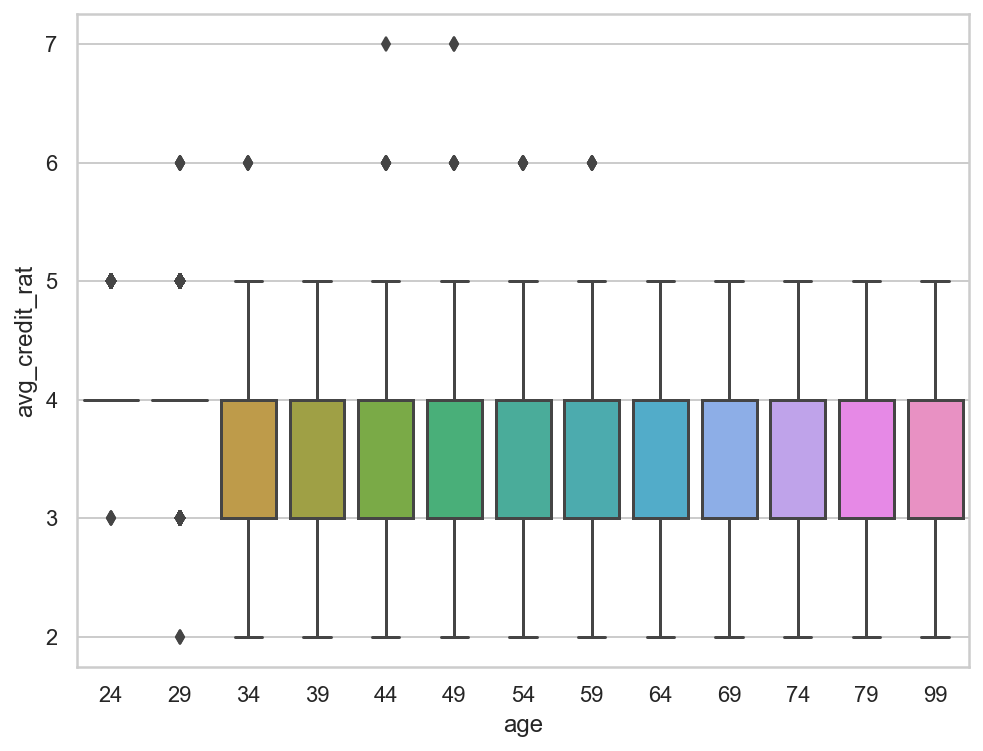

In [40]:
plt. figure(figsize=(8,6))
sns.boxplot(x='age',y='avg_credit_rat',data=df)
plt.show()

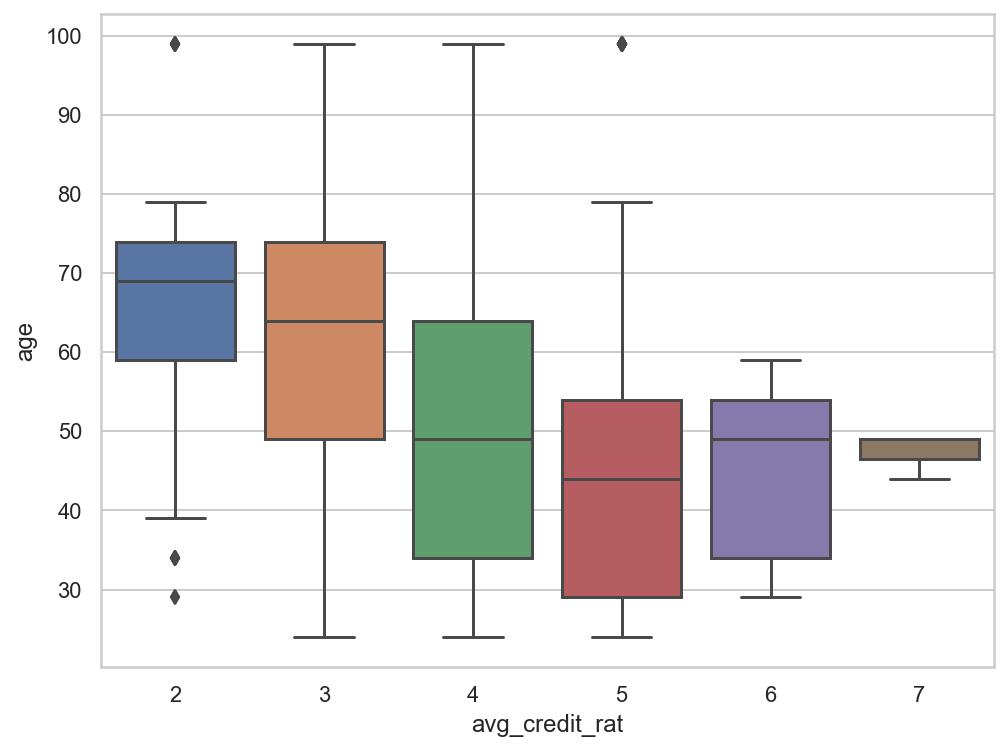

In [41]:
plt. figure(figsize=(8,6))
sns.boxplot(x='avg_credit_rat',y='age',data=df)
plt.show()

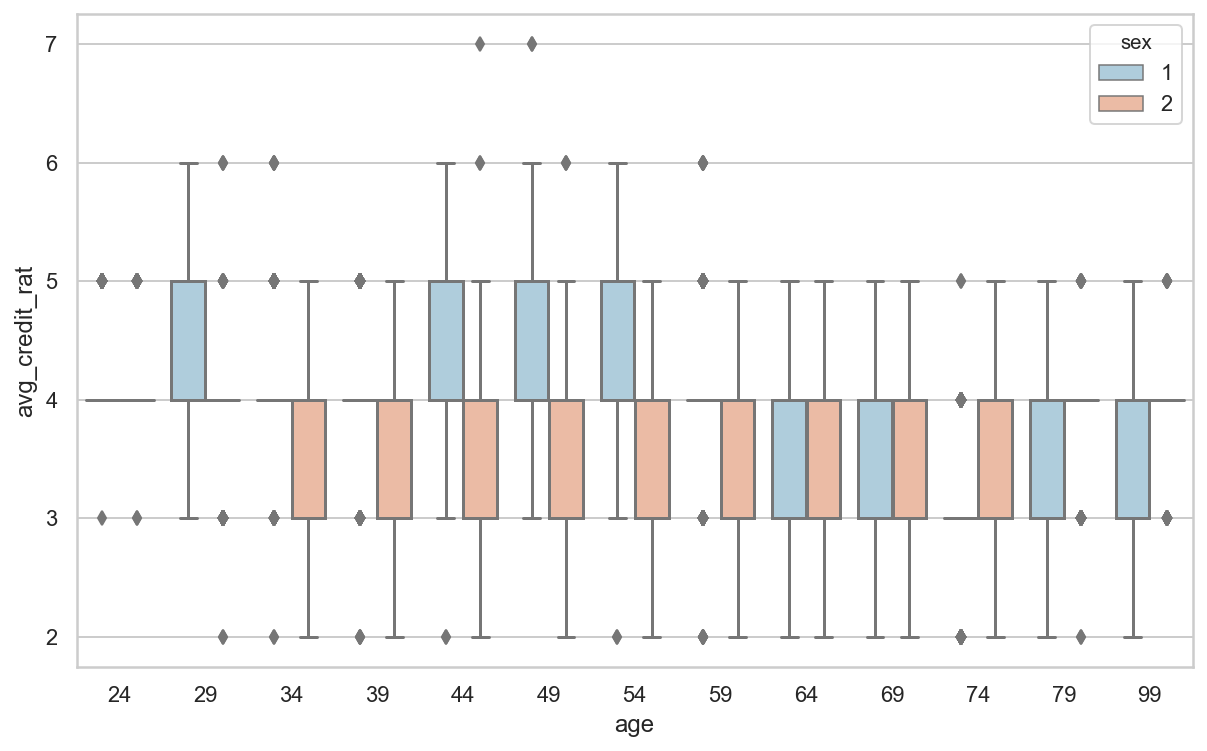

In [52]:
plt. figure(figsize=(10,6))
sns.boxplot(x='age',y='avg_credit_rat', hue="sex",data=df,palette="RdBu_r")
plt.show()

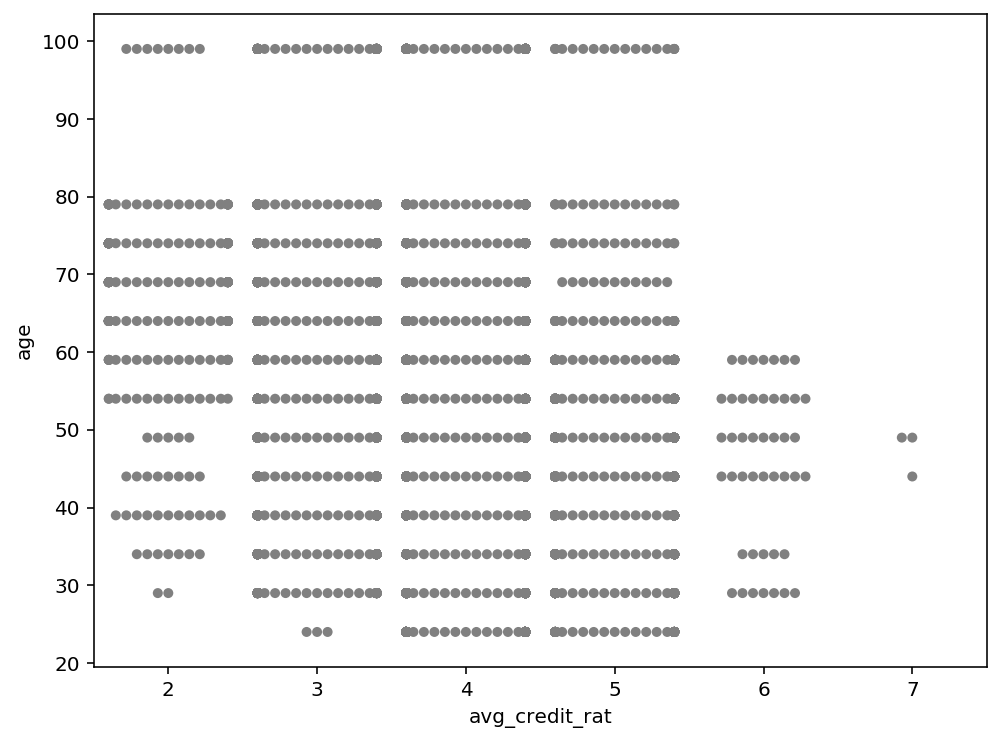

In [19]:
plt.figure(figsize=(8,6))
sns.swarmplot(x="avg_credit_rat",y="age",data=df,color=".5")
plt.show()

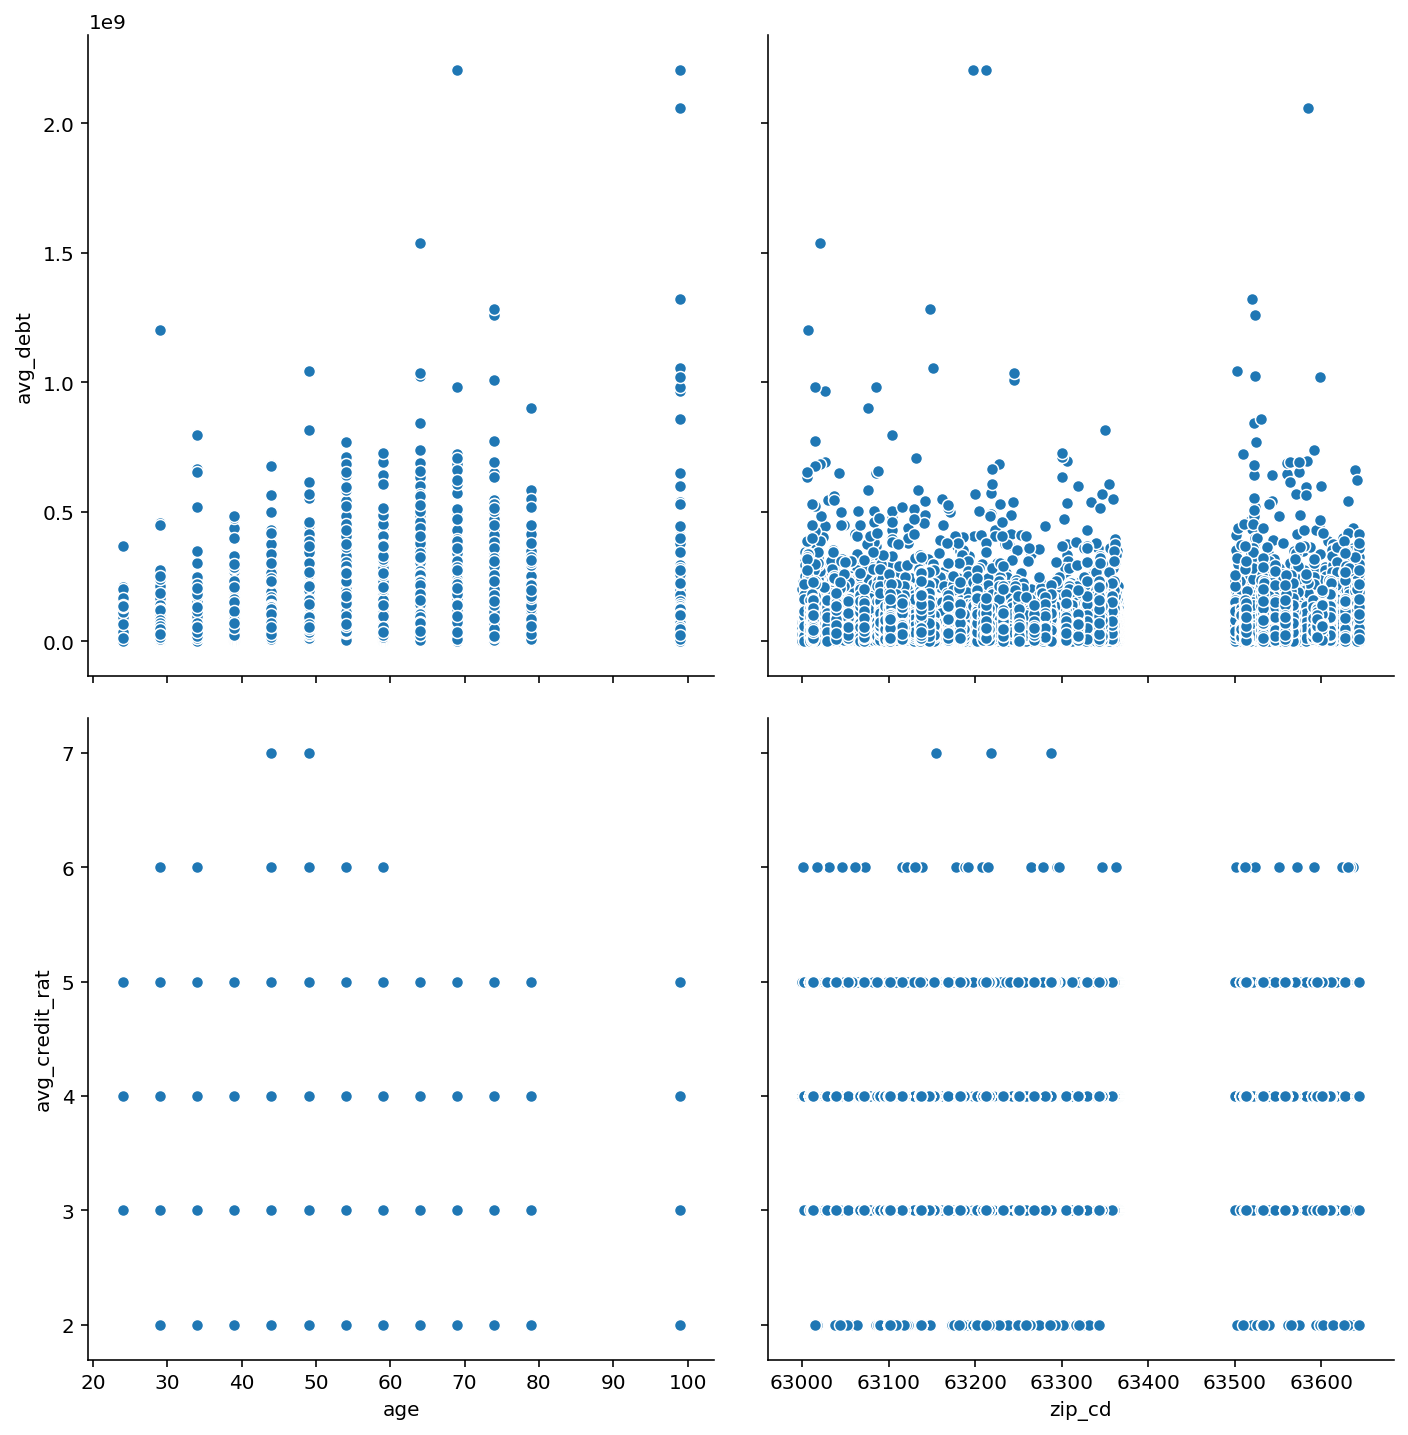

In [18]:
#jeju = sns.load_dataset(df)
sns.pairplot(data=df, x_vars=['age','zip_cd'], y_vars=['avg_debt','avg_credit_rat'] , height=5)
#sns.pairplot(jeju)

### 선형회귀분석

In [1]:
import numpy as np
import pandas as pd
#from sklearn import datasets, linear_model
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline


print("Matplotlib version", matplotlib.__version__)
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

Matplotlib version 3.1.1


In [ ]:
os.chdir(r"C:\Users\박유경\Desktop\project")
jeju = pd.read_csv('jeju_financial_life_data.csv', header='infer', na_values=[' '])
jeju= reduce_mem_usage(jeju)
jeju.head()

In [35]:
jeju.columns

Index(['zip_cd', 'year_month', 'x_axis', 'y_axis', 'sex', 'age', 'job_majorc',
       'job_smallc', 'job_public', 'job_profession', 'job_self', 'job_none',
       'job_other', 'avg_income', 'med_income', 'avg_spend',
       'avg_foreign_spend', 'avg_debt', 'avg_debt_credit', 'avg_debt_noneb',
       'avg_debt_mortgage', 'avg_debt_deposit', 'avg_debt_collateral',
       'avg_credit_rat', 'medium_resid_rat', 'large_resid_rat',
       'vehicle_own_rat'],
      dtype='object')

In [38]:
jeju.groupby('avg_credit_rat').count()

,zip_cd,year_month,x_axis,y_axis,sex,age,job_majorc,job_smallc,job_public,job_profession,...,avg_foreign_spend,avg_debt,avg_debt_credit,avg_debt_noneb,avg_debt_mortgage,avg_debt_deposit,avg_debt_collateral,medium_resid_rat,large_resid_rat,vehicle_own_rat
avg_credit_rat,,,,,,,,,,,,,,,,,,,,,
2,250,250,250,250,250,250,250,250,250,250,...,250,250,250,250,250,250,250,250,250,250
3,3244,3244,3244,3244,3244,3244,3244,3244,3244,3244,...,3244,3244,3244,3244,3244,3244,3244,3244,3244,3244
4,5731,5731,5731,5731,5731,5731,5731,5731,5731,5731,...,5731,5731,5731,5731,5731,5731,5731,5731,5731,5731
5,1149,1149,1149,1149,1149,1149,1149,1149,1149,1149,...,1149,1149,1149,1149,1149,1149,1149,1149,1149,1149
6,45,45,45,45,45,45,45,45,45,45,...,45,45,45,45,45,45,45,45,45,45
7,3,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3


In [50]:
jeju.groupby('age').describe()

zip_cd                                                                  \
     count          mean         std      min       25%      50%       75%   
age                                                                          
24   831.0  63281.087846  194.413993  63000.0  63126.50  63237.0  63500.00   
29   791.0  63280.838180  192.365894  63000.0  63128.00  63237.0  63364.50   
34   798.0  63280.517544  194.535593  63000.0  63126.25  63233.5  63365.00   
39   844.0  63283.257109  196.448917  63000.0  63125.75  63239.0  63504.50   
44   852.0  63282.390845  196.615538  63000.0  63124.75  63237.0  63504.50   
49   879.0  63286.056883  197.535445  63000.0  63126.00  63244.0  63509.00   
54   883.0  63285.257078  197.612566  63000.0  63124.50  63245.0  63507.50   
59   886.0  63286.580135  197.375005  63000.0  63126.25  63245.5  63508.75   
64   864.0  63287.356481  198.306703  63000.0  63128.00  63244.5  63510.00   
69   782.0  63285.723785  199.049452  63000.0  63128.25  63240.0  63508.00   
74   737.0  63291.200814  200.964449  63000.0  63129.00  63249.0  63513.00   
79   656.0  63292.849085  204.299152  63000.0  63126.00  63253.0  63516.00   
99   619.0  63294.924071  206.518449  63000.0  63123.00  63257.0  63521.00   

             year_month            ... large_resid_rat      vehicle_own_rat  \
         max      count      mean  ...             75%  max           count   
age                                ...                                        
24   63644.0      831.0  201902.0  ...       -499999.5  1.0           831.0   
29   63644.0      791.0  201902.0  ...             0.0  1.0           791.0   
34   63644.0      798.0  201902.0  ...             0.0  1.0           798.0   
39   63644.0      844.0  201902.0  ...       -999999.0  1.0           844.0   
44   63644.0      852.0  201902.0  ...       -999999.0  1.0           852.0   
49   63644.0      879.0  201902.0  ...       -999999.0  1.0           879.0   
54   63644.0      883.0  201902.0  ...       -999999.0  1.0           883.0   
59   63644.0      886.0  201902.0  ...       -999999.0  1.0           886.0   
64   63644.0      864.0  201902.0  ...       -999999.0  1.0           864.0   
69   63644.0      782.0  201902.0  ...       -999999.0  1.0           782.0   
74   63644.0      737.0  201902.0  ...       -999999.0  1.0           737.0   
79   63644.0      656.0  201902.0  ...       -999999.0  1.0           656.0   
99   63643.0      619.0  201902.0  ...       -999999.0  1.0           619.0   

                                                                      
         mean       std  min       25%       50%       75%       max  
age                                                                   
24   0.007447  0.016315  0.0  0.000000  0.000000  0.008970  0.142857  
29   0.045417  0.046520  0.0  0.000000  0.035714  0.070714  0.375000  
34   0.061623  0.057193  0.0  0.019706  0.052983  0.089936  0.333333  
39   0.068478  0.053226  0.0  0.033333  0.062500  0.092308  0.555556  
44   0.065615  0.051632  0.0  0.028695  0.060303  0.092227  0.363636  
49   0.061762  0.045750  0.0  0.029777  0.056338  0.086957  0.357143  
54   0.055136  0.044996  0.0  0.025641  0.047619  0.076923  0.375000  
59   0.046691  0.039518  0.0  0.018182  0.041667  0.067673  0.272727  
64   0.031355  0.035870  0.0  0.000000  0.023810  0.047619  0.250000  
69   0.020578  0.034364  0.0  0.000000  0.000000  0.035406  0.250000  
74   0.009693  0.022703  0.0  0.000000  0.000000  0.000000  0.150000  
79   0.005923  0.021224  0.0  0.000000  0.000000  0.000000  0.250000  
99   0.000503  0.004984  0.0  0.000000  0.000000  0.000000  0.083333  

[13 rows x 208 columns]

In [51]:
# 부채, 신용도가 차를 갖고 있는지에 미치는 영향(기각)
# 부채, 소득대비 소비액 -> 신용도 미치는 영향

In [2]:
import pandas as pd
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
data = pd.read_csv('jeju_financial_life_data.csv', engine='python')
data.head()


,zip_cd,year_month,x_axis,y_axis,sex,age,job_majorc,job_smallc,job_public,job_profession,...,avg_debt,avg_debt_credit,avg_debt_noneb,avg_debt_mortgage,avg_debt_deposit,avg_debt_collateral,avg_credit_rat,medium_resid_rat,large_resid_rat,vehicle_own_rat
0,63299,201902,126.565889,33.513210,1,54,0.0,0.166667,0.000000,0.000000,...,24285196,11419148,8863595,55550000,0,55550000,5,-999999.0,-999999.0,0.000000
1,63560,201902,126.497121,33.247225,1,59,0.0,0.125000,0.000000,0.000000,...,108571077,25896955,13317443,0,200000000,74421721,4,-999999.0,-999999.0,0.000000
2,63560,201902,126.497121,33.247225,2,49,0.0,0.250000,0.000000,0.000000,...,26424335,12015311,12015311,40833359,0,40833359,2,-999999.0,-999999.0,0.000000
3,63560,201902,126.497121,33.247225,1,54,0.0,0.181818,0.090909,0.090909,...,647716901,39952556,21558153,36697792,0,706300496,4,-999999.0,-999999.0,0.166667
4,63560,201902,126.497121,33.247225,1,49,0.0,0.250000,0.000000,0.000000,...,248232725,35712501,5568751,0,0,626810674,5,-999999.0,-999999.0,0.000000


In [48]:
data.notnull()

,zip_cd,year_month,x_axis,y_axis,sex,age,job_majorc,job_smallc,job_public,job_profession,...,avg_debt_mortgage,avg_debt_deposit,avg_debt_collateral,avg_credit_rat,medium_resid_rat,large_resid_rat,vehicle_own_rat,car_own,spend_income,credit_hl
0,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
1,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
2,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
3,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
4,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
5,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
6,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
7,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
8,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
9,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True


In [3]:
data['credit_hl']=np.where(data['avg_credit_rat']<5 ,1,0)
data['monthly_income']=(data['avg_income']/12)
data['monthly_spend']=(data['avg_spend']/3)
data['spend_income']=(data.monthly_spend/(data.monthly_income+1))
data['spend_income'].max()

1207923.3333333333

In [4]:
x=data[['spend_income','avg_debt']]
y=data[['credit_hl']]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)
#https://no17.tistory.com/202



In [5]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression() #로지스틱 회귀분석 시행
log.fit(x_train, y_train) #모델의 정확도 확인

#print(x_train)
print('학습용 데이터셋 정확도 : %.2f' % log.score(x_train, y_train))
print('검증용 데이터셋 정확도 : %.2f' % log.score(x_test, y_test))

학습용 데이터셋 정확도 : 0.89
검증용 데이터셋 정확도 : 0.88


In [6]:
from sklearn.metrics import classification_report
y_pred=log.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       370
           1       0.88      1.00      0.94      2757

    accuracy                           0.88      3127
   macro avg       0.44      0.50      0.47      3127
weighted avg       0.78      0.88      0.83      3127



In [7]:
np.asarray(x).dtype
#pd.DataFrame(range(100)).dtypes

dtype('float64')

In [8]:
import statsmodels.api as sm

x= np.asarray(x)
k = np.asarray(data[['credit_hl']])



logit=sm.Logit(k,x) #로지스틱 회귀분석 시행
result=logit.fit()

Optimization terminated successfully.
         Current function value: 0.457849
         Iterations 5


In [9]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                10422
Model:                          Logit   Df Residuals:                    10420
Method:                           MLE   Df Model:                            1
Date:                Mon, 05 Aug 2019   Pseudo R-squ.:                 -0.2841
Time:                        15:07:57   Log-Likelihood:                -4771.7
converged:                       True   LL-Null:                       -3715.9
Covariance Type:            nonrobust   LLR p-value:                     1.000
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1          3.495e-06   1.69e-06      2.065      0.039    1.78e-07    6.81e-06
x2          2.037e-08   4.21e-10     48.423      0.000    1.95e-08    2.12e-08
==============================================================================
"""

In [10]:
result.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                         Results: Logit
================================================================
Model:              Logit            Pseudo R-squared: -0.284   
Dependent Variable: y                AIC:              9547.3959
Date:               2019-08-05 15:07 BIC:              9561.8992
No. Observations:   10422            Log-Likelihood:   -4771.7  
Df Model:           1                LL-Null:          -3715.9  
Df Residuals:       10420            LLR p-value:      1.0000   
Converged:          1.0000           Scale:            1.0000   
No. Iterations:     5.0000                                      
-------------------------------------------------------------------
        Coef.     Std.Err.       z       P>|z|     [0.025    0.975]
-------------------------------------------------------------------
x1      0.0000      0.0000     2.0653    0.0389    0.0000    0.0000
x2      0.0000      0.0000    48.4233    0.0000    0.0000    0.0000
================================================================

"""

In [11]:
np.exp(result.params)

array([1.0000035 , 1.00000002])

In [79]:
result.pvalues

#각 독립변수가 얼마나 종속변수에 영향을 미치는지 나타낸다. 
#정확히 말하면, 회귀분석에서 수행하는 테스트에서 P값은 독립변수의 계수가 0일 확률을 나타냅니다. 
#즉, P값이 작을수록 해당 독립변수가 모델에서 의미를 가지며, 
#P값이 높을수록 해당 독립변수는 종속 변수에 영향을 끼치지 못하게 됩니다. 
#일반적으로, P값이 0.05 미만일 때 통계적으로 유의하다고 합니다. 
#확인하는 방법은 results.pvalues

array([0.03889005, 0.        ])

In [113]:
#data.corr()
corr_with_rat = data.corrwith(data['job_smallc'])
corr_with_rat

zip_cd                -0.070226
year_month                  NaN
x_axis                -0.019969
y_axis                 0.084094
sex                   -0.182243
age                   -0.551662
job_majorc             0.360172
job_smallc             1.000000
job_public             0.340813
job_profession         0.170032
job_self              -0.331382
job_none              -0.512313
job_other              0.317125
avg_income             0.184996
med_income             0.344991
avg_spend              0.465512
avg_foreign_spend      0.218155
avg_debt              -0.046983
avg_debt_credit        0.141469
avg_debt_noneb        -0.021964
avg_debt_mortgage      0.131146
avg_debt_deposit       0.050624
avg_debt_collateral    0.012769
avg_credit_rat         0.238913
medium_resid_rat       0.058610
large_resid_rat        0.058610
vehicle_own_rat        0.393297
credit_hl             -0.216221
monthly_income         0.184996
monthly_spend          0.465512
spend_income          -0.048670
dtype: f

In [12]:
data['avg_credit_rat'].corr(data['avg_debt_credit','avg_debt_noneb','avg_debt_mortgage','avg_debt_deposit','avg_debt_collateral'])

KeyError: ('avg_debt_credit', 'avg_debt_noneb', 'avg_debt_mortgage', 'avg_debt_deposit', 'avg_debt_collateral')

In [ ]:
lm_bed = sms.OLS(df['price'], df[['intercept', 'bedrooms']])
results_bed = lm_bed.fit()
results_bed.summary()

In [34]:
# 의도: Household Income Index( 가계수지지표= 소비/소득 , 이하 hi로 표기 )이 
# 1을 초과하는 그룹 (= 소득보다 소비가 많은 그룹)이 차지하는 비율을
# 신용등급별로 plot


data['avg_credit_rat'].value_counts() #dfjj는 제주도원본파일의 csv


hi = (data.avg_spend) / ( data.avg_income/12 + 1 ) # Household Income Index

dfdanger = data[hi > 1]
dfdanger_count=dfdanger['avg_credit_rat'].value_counts() #dfdanger는 hi > 1 인 위험군 
dfdanger_count

4    4175
3    2205
5     982
2     166
6      39
7       3
Name: avg_credit_rat, dtype: int64

In [42]:
credit_count=data['avg_credit_rat'].value_counts() 
credit_count

4    5731
3    3244
5    1149
2     250
6      45
7       3
Name: avg_credit_rat, dtype: int64

In [43]:
# credit_count= np.asarray(credit_count)
# dfdanger_count= np.asarray(dfdanger_count)
df_rate=dfdanger_count/credit_count



In [44]:
df_rate

4    0.728494
3    0.679716
5    0.854656
2    0.664000
6    0.866667
7    1.000000
Name: avg_credit_rat, dtype: float64

In [64]:
from pandas import DataFrame
df_credit_count=DataFrame(credit_count)
df_credit_count.index

Int64Index([4, 3, 5, 2, 6, 7], dtype='int64')

In [77]:
data2 =[credit_count-dfdanger_count]
data2

AttributeError: 'list' object has no attribute 'values'

TypeError: only size-1 arrays can be converted to Python scalars

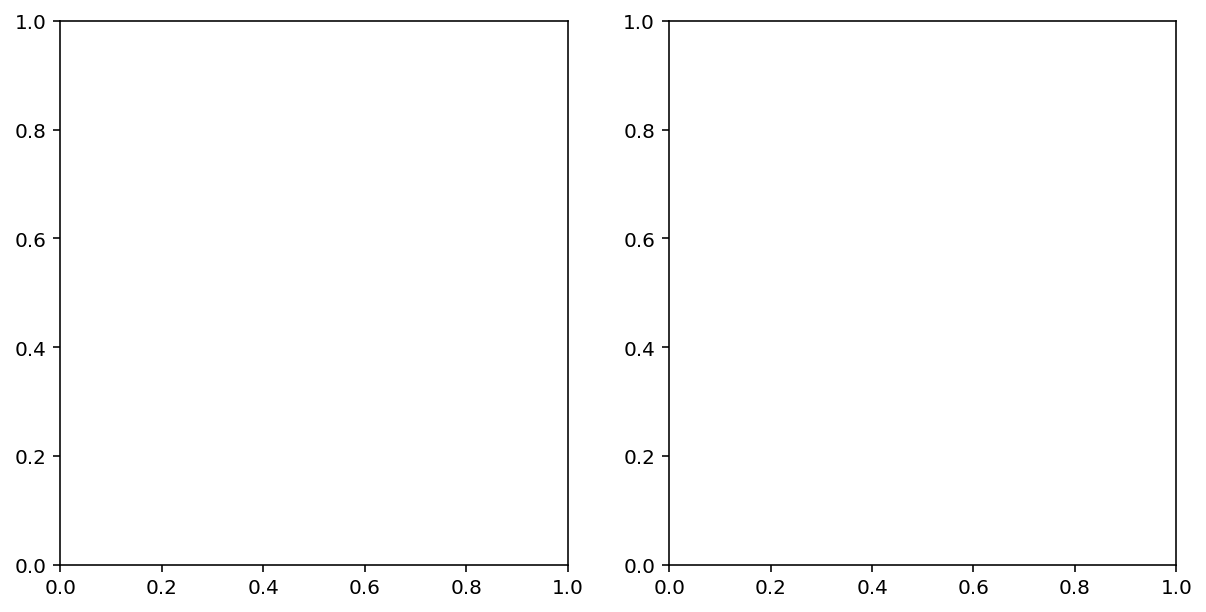

In [68]:
from matplotlib import pyplot as plt

data1 = [4175, 2205,  982,  166,   39,    3]
data2 = [credit_count-dfdanger_count]

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))

## Absolute count

ax1.bar(range(len(data1)), data1, label='data 1', alpha=0.5, color='b')
ax1.bar(range(len(data2)), data2, bottom=data1, label='data 2', alpha=0.5, color='r')
plt.sca(ax1)
plt.xticks([1,2,3,4,5,6],['4','3','5','2','6','7'])
ax1.set_ylabel("Count")
ax1.set_xlabel("")
plt.legend(loc='upper left')

# ## Percent

# totals = [i + j for i,j in zip(data1, data2)]
# data1_rel = [i / j * 100 for  i,j in zip(data1, totals)]
# data2_rel = [i / j * 100 for  i,j in zip(data2, totals)]

# ax2.bar(range(len(data1_rel)), data1_rel, alpha=0.5, color='b')
# ax2.bar(range(len(data2_rel)), data2_rel, bottom=data1_rel, alpha=0.5, color='r')
# plt.sca(ax2)
# plt.xticks([1,2,3,4,5,6],['4','3','5','2','6','7'])
# ax2.set_ylabel("Percentage")
# ax2.set_xlabel("")

plt.show()


In [95]:
import numpy as np
print(np.var(data.avg_income)) #분산
print(np.std(data.avg_income)) #표준편차

191001799838379.44
13820340.076799102


In [102]:
data.avg_income

0        37188000
1        35378000
2        32119000
3        64746000
4        29578000
           ...   
10417    37621000
10418    64168000
10419    31197000
10420    34930000
10421    37879000
Name: avg_income, Length: 10422, dtype: int64

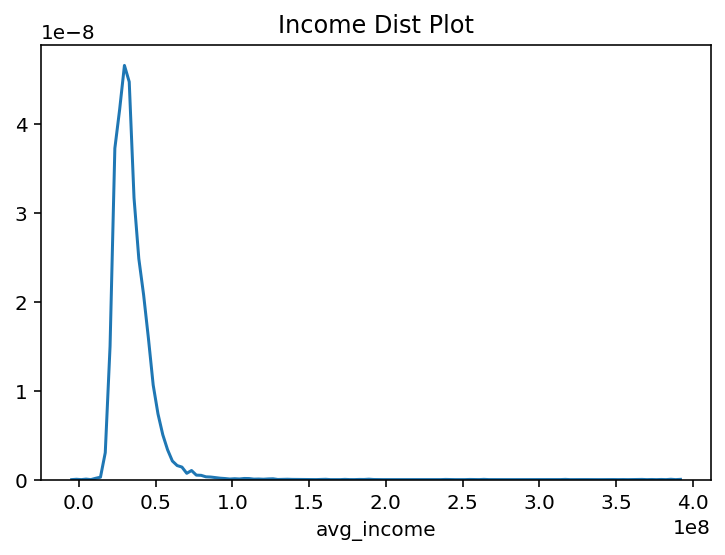

In [106]:
sns.distplot(data.avg_income,bins=2, hist=False)
plt.title("Income Dist Plot")
plt.show()

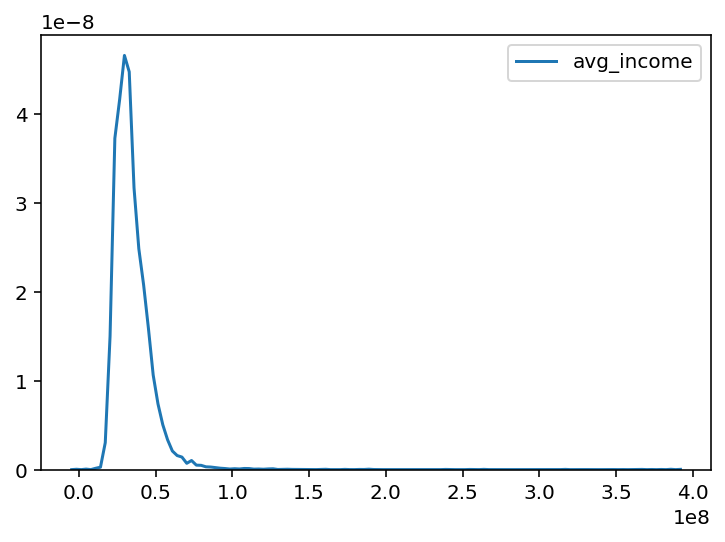

In [107]:
sns.kdeplot(data.avg_income)